In [1]:
import pandas as pd
import XCCourseHelper as XC
import os
import matplotlib.pyplot as plt
import GradeAdjustedPace

In [2]:
course = 'Sulphur'
gpx_file='./Courses/Trails/Sulphur 50k.gpx'
df, turn_st_dev, tot_deg_turned, HairpinCount, perim, area = XC.MakeInitialDataframe(
        course, gpx_file
    )

c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_newRow, ignore_index=True)
c:\Users\jewalsh\OneDrive - ArcelorMittal\Documents\GitHub\XCCourseAnalysis\XCCourseHelper.py:258: FutureWarning: The frame.append method is deprecated and will be

In [3]:
from scipy.signal import savgol_filter
pace_hist = ((df["Time Difference"] / 60) / df["DistanceChangeInKM"]).values
df["PaceInMinPerKM"] = pace_hist

df['PaceInMinPerKM'] = df['PaceInMinPerKM'].apply(lambda x: x if x < 4.2 else 4.2)
df["PaceInMinPerKM"] = savgol_filter(df["PaceInMinPerKM"], 101, 3)

4.072631044373204


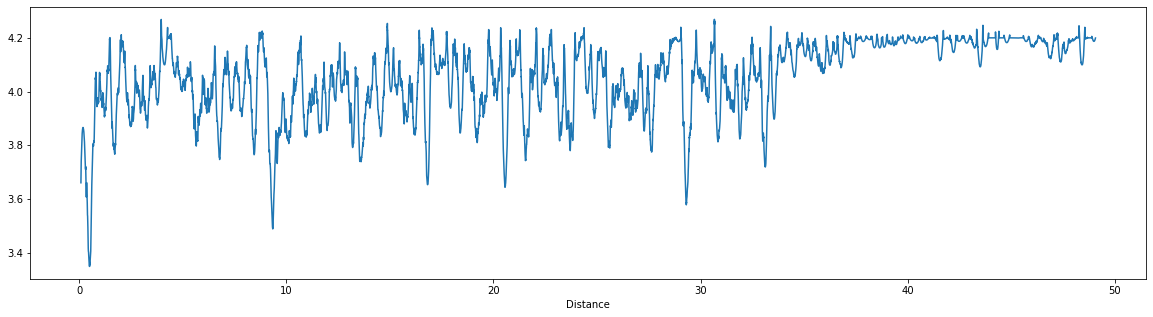

In [4]:
df['PaceInMinPerKM'].plot(figsize=(20,5))
print(df['PaceInMinPerKM'].mean())

<AxesSubplot:xlabel='Distance'>

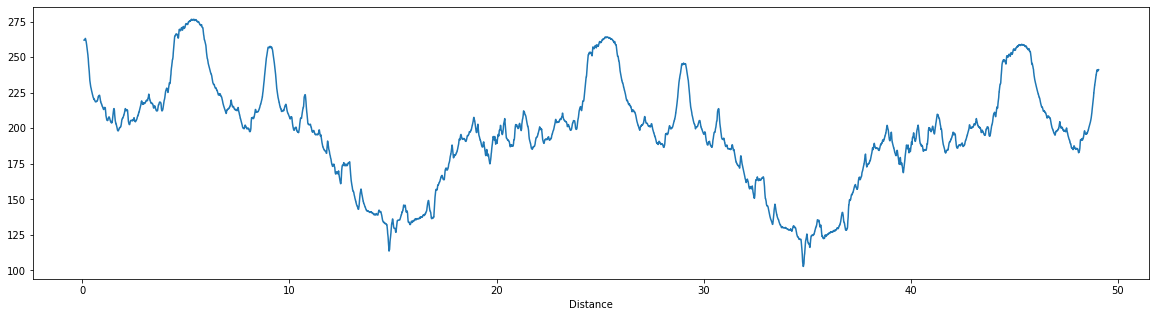

In [5]:
df['Elevation'].plot(figsize=(20,5))

### Adding Gradient

In [6]:
df['Gradient'] = df['Gradient'].apply(lambda x: x if x < 100 else 100)
df['Gradient'].plot(figsize=(20,5))
# plt.xlim(0,31)
plt.hlines(0,0,31, colors='k', linestyles='dashed')

PlotElevationProfile(df)
# df

KeyError: 'Gradient'

In [ ]:
def PlotElevationProfile(df):
    fig = plt.figure(figsize=(20,5))
    plt.fill_between(x=df.index, y1=0, y2=df['Elevation'])
    ymin = 100
    ymax = 300
    plt.ylim(ymin,ymax)
    # plt.xlim(0,31)
    plt.xlabel('Distance (km)')
    plt.ylabel('Elevation (m)')
    plt.vlines(x=[10,15,20], ymin=ymin, ymax=ymax, colors='k', linestyles='dashed')
    plt.title('Around the Bay Elevation Profile')
    plt.show()

In [ ]:
GAP = GradeAdjustedPace.GAP(df)
GAP.getMinettiCourseGAP()
GAP.getStravaCourseGAP()
df = GAP.gradientCalculation()

In [ ]:
df.to_csv('./Course DataFrames/ATB30km.csv')

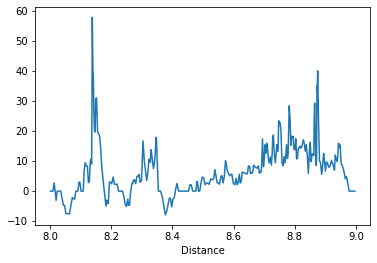

<AxesSubplot:xlabel='Distance'>

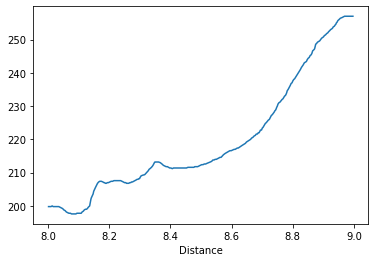

In [ ]:
df['Gradient'].loc[(df.index<9) & (df.index>8)].plot()
plt.show()
df['Elevation'].loc[(df.index<9) & (df.index>8)].plot()

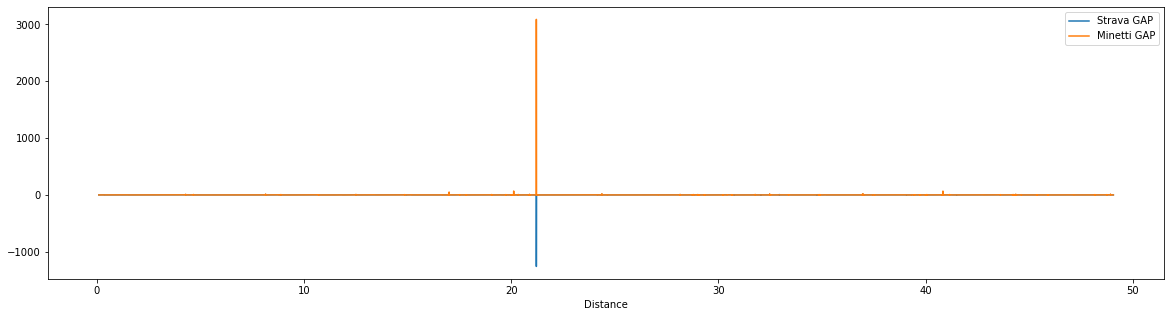

135.983098302849 179.99446982822096


In [ ]:
fig = plt.figure(figsize=(20,5))
# Course['Jack Daniels'].plot(label='Jack Daniels')
# Course['John Kellogg'].plot() # no downhill formula
(df['Strava GAP']*df['Time Difference']-df['Time Difference']).plot(label='Strava GAP')
(df['Minetti GAP']*df['Time Difference']-df['Time Difference']).plot(label='Minetti GAP')
# plt.xlim(0,31)
plt.legend()
plt.show()
print(df['Strava GAP'].mean()*(2*60), df['Minetti GAP'].mean()*(2*60))